In this notebook I'm going to focus on the text data. To see if any of these features are useful in identifying toxic text, I want to extract the following information per observation:

- word counts
- character counts
- special character counts
- capitalized letter counts

Couldn't get these parts to work fully, would like to come back to this
- swear word counts (using most common)
- racial/ethic slur counts (using most common)
- misogynist slur counts (using most common)
    - looking into research on most common words for these categories

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_colwidth', 10000)
# pd.set_option('display.max_rows', 1000)

In [57]:
df = pd.read_csv('tox_with_sent_nulls_dropped.csv')

In [58]:
df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,neg,neu,pos
0,0,0,0,0,0,0,1,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27","Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0.5574,0.000,0.897,0.103
1,0,0,0,0,0,0,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)","D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0.2942,0.099,0.743,0.158
2,0,0,0,0,0,0,1,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.","Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",-0.1779,0.083,0.849,0.068
3,0,0,0,0,0,0,1,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,""" More I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know. There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0.5106,0.022,0.916,0.062
4,0,0,0,0,0,0,1,"You, sir, are my hero. Any chance you remember what page that's on?","You, sir, are my hero. Any chance you remember what page that's on?",0.6808,0.000,0.663,0.337


In [59]:
df.shape

(159565, 13)

In [60]:
#I'm going to probably need to add to these lists, but it's a start, I'm trying to find acedemic articles on common abusive language choices online
# swears = ['fuck', 'shit', 'asshole', 'ass', 'damn', 'hell', 'cock', 'goddamn']
# misogynist = ['cunt', 'bitch', 'whore', 'slut', 'twat']
# racial_ethnic = ['nigger', 'wetback', 'chink', 'spick', 'towelhead', 'kike']
# lgbtq = ['fag', 'faggot','dyke', 'shemale', 'tranny', 'gay boy']


def text_features(text, swears=swears, misogynist = misogynist, racial_ethnic = racial_ethnic, lgbtq = lgbtq):
    
    # Count the number of words 
    word_count = len(text.split())

    # Count the number of characters 
    character_count = len(text)

    # Count the number of special characters (finds non-alphanumeric and non-whitespace characters)
    special_character_count = len(re.findall(r'[^\w\s]', text))

    # Count the number of capitalized letters
    capitalized_letter_count = sum(1 for char in text if char.isalpha() and char.isupper())



    return {
        'word count': word_count,
        'character count': character_count,
        'special characters': special_character_count,
        'capitalized letters': capitalized_letter_count 
    }



In [61]:
df[df['identity_hate'] == 1][:5]

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,neg,neu,pos
42,1,0,1,0,1,1,0,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!","You are gay or antisemmitian? Archangel WHite Tiger Meow! Greetingshhh! Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone... 1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings! 2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals! 3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore! Beware of the Dark Side!",-0.9548,0.156,0.844,0.0
105,1,0,1,0,1,1,0,A pair of jew-hating weiner nazi schmucks.,A pair of jew-hating weiner nazi schmucks.,0.0000,0.000,1.000,0.0
176,1,0,1,1,1,1,0,I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms,I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms,-0.8625,0.304,0.696,0.0
218,1,0,1,0,1,1,0,"Kill all niggers. \n\nI have hard, that others have said this.. should this be included? That racists sometimes say these.","Kill all niggers. I have hard, that others have said this.. should this be included? That racists sometimes say these.",-0.8625,0.375,0.625,0.0
238,1,0,1,0,1,1,0,u r a tw@ fuck off u gay boy.U r smelly.Fuck ur mum poopie,u r a tw@ fuck off u gay boy.U r smelly.Fuck ur mum poopie,-0.5423,0.304,0.696,0.0


In [62]:
#testing this function with a row from the df

text_features('u r a tw@ fuck off u gay boy.U r smelly.Fuck ur mum poopie')

{'word count': 14,
 'character count': 58,
 'special characters': 3,
 'capitalized letters': 2,
 'swear words': 2,
 'misogynist words': 0,
 'racial_ethnic slurs': 0,
 'lgbtq hate': 1}

In [63]:
df.isnull().sum()

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
neutral          0
comment_text     0
cleaner_text     0
compound         0
neg              0
neu              0
pos              0
dtype: int64

In [64]:
df['cleaner_text'] = df['cleaner_text'].astype(str)

In [65]:
text_features_df = df['cleaner_text'].apply(text_features).apply(pd.Series)

In [66]:
text_features_df.head()

,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate
0,43,264,10,17,0,0,0,0
1,17,112,12,8,0,0,0,0
2,42,233,6,4,0,0,0,0
3,113,622,19,11,0,0,0,0
4,13,67,5,2,0,0,0,0


In [67]:
text_features_df.shape

(159565, 8)

In [68]:
df.head(10)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,neg,neu,pos
0,0,0,0,0,0,0,1,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27","Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0.5574,0.000,0.897,0.103
1,0,0,0,0,0,0,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)","D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0.2942,0.099,0.743,0.158
2,0,0,0,0,0,0,1,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.","Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",-0.1779,0.083,0.849,0.068
3,0,0,0,0,0,0,1,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,""" More I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know. There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0.5106,0.022,0.916,0.062
4,0,0,0,0,0,0,1,"You, sir, are my hero. Any chance you remember what page that's on?","You, sir, are my hero. Any chance you remember what page that's on?",0.6808,0.000,0.663,0.337
5,0,0,0,0,0,0,1,"""\n\nCongratulations from me as well, use the tools well. · talk """,""" Congratulations from me as well, use the tools well. · talk """,0.7964,0.000,0.464,0.536
6,1,1,1,0,1,0,0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,-0.7783,0.531,0.469,0.000
7,0,0,0,0,0,0,1,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.","Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",-0.1779,0.129,0.773,0.099
8,0,0,0,0,0,0,1,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with experti

In [69]:
df.shape

(159565, 13)

Adding the text features to the text and sentiment dataset

In [74]:
combined = pd.concat([df, text_features_df], axis = 1)

In [75]:
combined.head(2)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,comment_text,cleaner_text,compound,...,neu,pos,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate
0,0,0,0,0,0,0,1,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27","Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0.5574,...,0.897,0.103,43,264,10,17,0,0,0,0
1,0,0,0,0,0,0,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)","D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0.2942,...,0.743,0.158,17,112,12,8,0,0,0,0


In [76]:
combined.isnull().sum()

toxic                  0
severe_toxic           0
obscene                0
threat                 0
insult                 0
identity_hate          0
neutral                0
comment_text           0
cleaner_text           0
compound               0
neg                    0
neu                    0
pos                    0
word count             0
character count        0
special characters     0
capitalized letters    0
swear words            0
misogynist words       0
racial_ethnic slurs    0
lgbtq hate             0
dtype: int64

In [77]:
#export as csv before dropping any columns
combined.to_csv('combined_all.csv', index = False)

Going to drop a few columns that I don't need anymore. 

In [78]:
combined.drop(columns = ['neg', 'neu', 'pos', 'comment_text'], inplace = True)

In [79]:
combined.head(2)

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,cleaner_text,compound,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate
0,0,0,0,0,0,0,1,"Explanation Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0.5574,43,264,10,17,0,0,0,0
1,0,0,0,0,0,0,1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0.2942,17,112,12,8,0,0,0,0


In [80]:
combined.to_csv('combined.csv', index = False)

##### EDA with the Text Features

In [81]:
combined.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,neutral,compound,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate
count,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000
mean,0.095848,0.009996,0.052950,0.002996,0.049365,0.008805,0.898317,0.105659,67.218883,390.724163,15.397036,17.021352,0.403246,0.039814,0.023489,0.043631
std,0.294384,0.099479,0.223935,0.054651,0.216631,0.093422,0.302232,0.569114,99.153155,586.265200,35.737014,96.264405,7.174239,2.357827,2.715824,5.499488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.318200,17.000000,94.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,36.000000,203.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.609600,75.000000,432.000000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1411.000000,5000.000000,4942.000000,4960.000000,1238.000000,474.000000,709.000000,1426.000000


In [82]:
combined[['word count', 'character count', 'special characters', 'capitalized letters', 'swear words', 'misogynist words', 'racial_ethnic slurs', 'lgbtq hate']].describe()

,word count,character count,special characters,capitalized letters,swear words,misogynist words,racial_ethnic slurs,lgbtq hate
count,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000,159565.000000
mean,67.218883,390.724163,15.397036,17.021352,0.403246,0.039814,0.023489,0.043631
std,99.153155,586.265200,35.737014,96.264405,7.174239,2.357827,2.715824,5.499488
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,94.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,203.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,432.000000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000
max,1411.000000,5000.000000,4942.000000,4960.000000,1238.000000,474.000000,709.000000,1426.000000


looking at the max in each of these... something is a little goofy here. Let's look at each of columns to what's going on. It also looks like nothing was really picked up foor the different word type categories... will have to comoe back to this part. The test worked earlier, but the actualy comment text is messier, so I'm going to have to get more creative. For the moment I'll focus on word count, character count, special characters and capitalized letters.

In [83]:
combined[['word count', 'character count', 'special characters', 'capitalized letters']].describe()

,word count,character count,special characters,capitalized letters
count,159565.000000,159565.000000,159565.000000,159565.000000
mean,67.218883,390.724163,15.397036,17.021352
std,99.153155,586.265200,35.737014,96.264405
min,0.000000,1.000000,0.000000,0.000000
25%,17.000000,94.000000,4.000000,3.000000
50%,36.000000,203.000000,8.000000,7.000000
75%,75.000000,432.000000,17.000000,15.000000
max,1411.000000,5000.000000,4942.000000,4960.000000


There are obviously some outlier I'm going to need to dig into

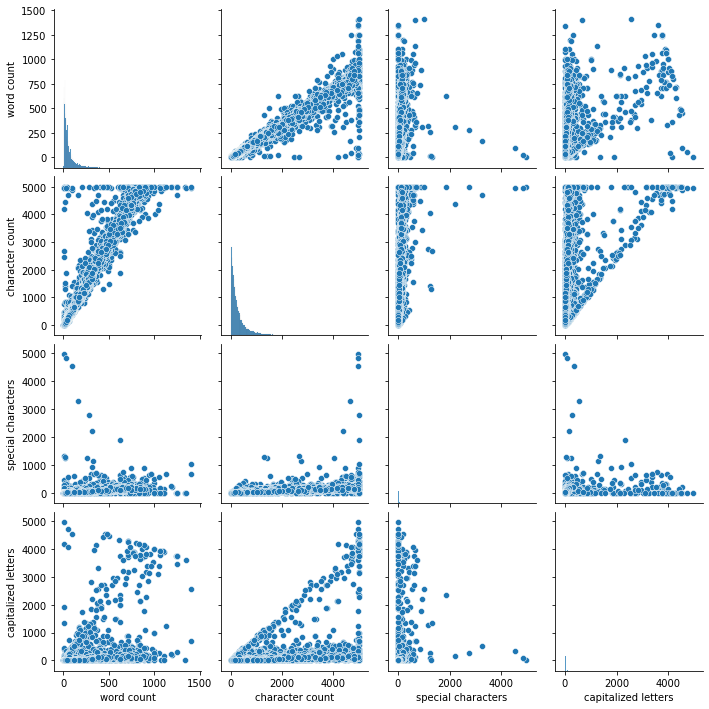

In [84]:
sns.pairplot(data = combined, vars = ['word count', 'character count', 'special characters', 'capitalized letters'])

In [87]:
# Create box plot using seaborn

def boxplots(column_list, label, data):
    for col in column_list:
        for label in labels: 
            plt.figure(figsize=(6, 4))
            sns.boxplot(x= label, y = col, data = data)
            plt.xlabel(col)
            plt.ylabel('Values')

       

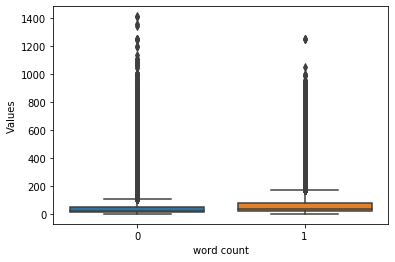

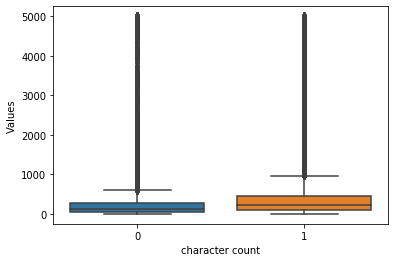

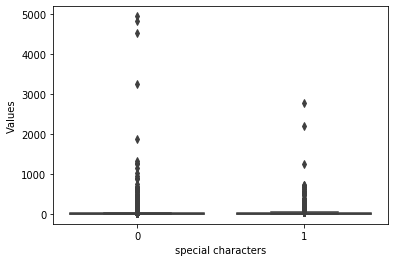

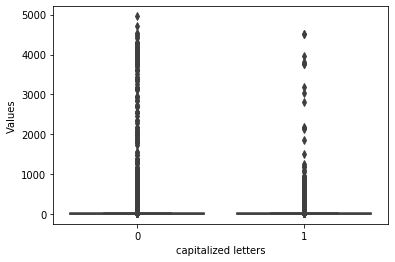

In [88]:
columns = ['word count', 'character count', 'special characters', 'capitalized letters']
labels = ['neutral']
boxplots(columns, labels,  combined)

There are clearly a bunch of outliers I'm going to need to dig into for each of these columns. Will dig more this weekend. 